In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv('customer_analysis.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Data Cleaning

In [3]:
# Find Missing Values

df.isna().sum()

# Income have 24 missing value

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
# Fill "Income" values with mean of income column

mean_income = df['Income'].mean()
df['Income'].fillna(mean_income, inplace=True)

In [5]:
# Find Missing Values

df.isna().sum()

# No Missing Values

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [6]:
# Convertion format of Dt_Customer column to date time format to %d-%m-%Y

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

df['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [7]:
# Age Extraction
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

# Spending Power
df['Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Household Living Arrangement
df['Living_With'] = df['Marital_Status'].replace({'Married': 'With Partner', 'Single': 'Alone', 'Divorced': 'Alone', 'Widow': 'Alone', 'YOLO': 'Alone','Absurd': 'Alone','Together': 'With Partner'})

# Family Dynamics
df['Children'] = df['Kidhome'] + df['Teenhome']

# Family Unity
df['Family_Size'] = df['Children'] + df['NumDealsPurchases']  # Assuming adults in 'NumDealsPurchases'

# Parental Status
df['Is_Parent'] = (df['Children'] > 0).astype(int)

# Educational Evolution
df['Education_Level'] = df['Education'].map({'PhD': 'Postgraduate', 'Master': 'Postgraduate', 'Graduation': 'Undergraduate'})

# # Farewell to Redundancy (drop the 'Year_Birth' column, and other columns as needed)
df.drop(columns=['Year_Birth', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Marital_Status', 'Kidhome', 'Teenhome','Children', 'NumDealsPurchases', 'Education' ], inplace=True)

## Data Preparation

In [8]:
label_encoder = LabelEncoder()
df['Living_With_encoded'] = label_encoder.fit_transform(df['Living_With'])
df['Education_Level_encoded'] = label_encoder.fit_transform(df['Education_Level'])

In [9]:
scaler = StandardScaler()
df[['Age', 'Spent']] = scaler.fit_transform(df[['Age', 'Spent']])

In [10]:
n_components = 2

pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df[['Age', 'Spent']])

df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

## Clustering

C:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

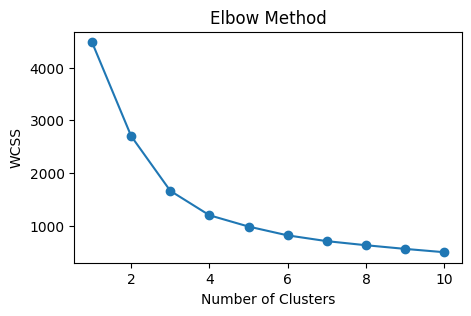

In [17]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=500, random_state=42)
    kmeans.fit(df[['Age', 'Spent']]) 
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(5, 3))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
# Agglomerative Clustering
findknee = KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing")
print("the best k for your model is ",findknee.elbow)

the best k for your model is  4


In [19]:
agg_clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
df['Cluster'] = agg_clustering.fit_predict(df[['Age', 'Spent']])  

C:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


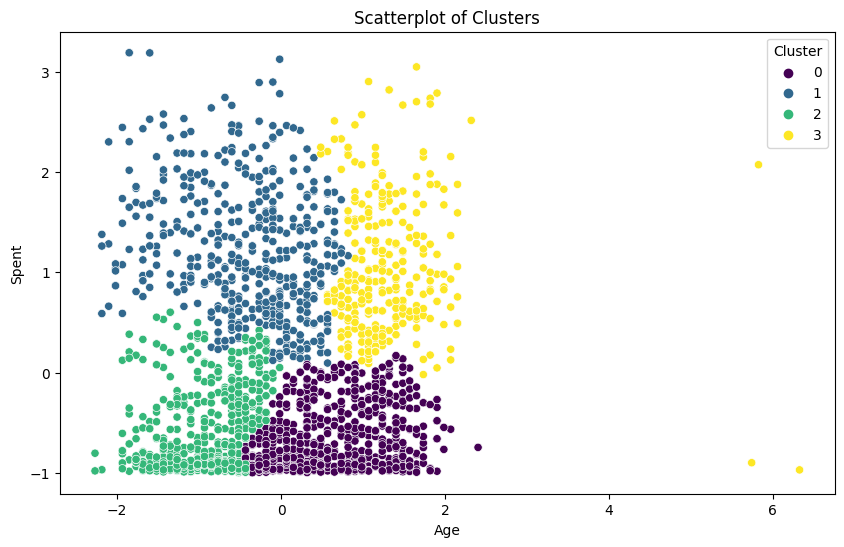

C:\Users\james\AppData\Local\Temp\ipykernel_14436\1281543450.py:10: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=df, x='Cluster', y='Age', palette='viridis')
C:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 51.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 55.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\james\AppData\Local\Pro

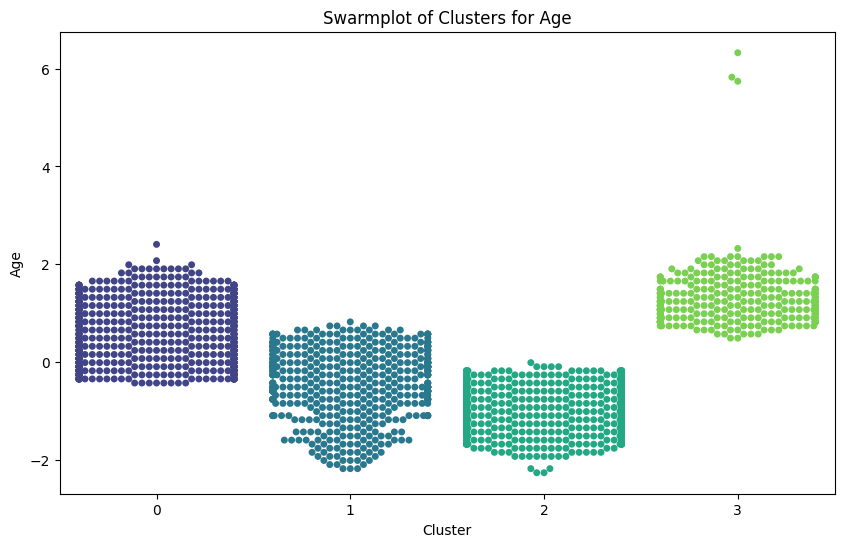

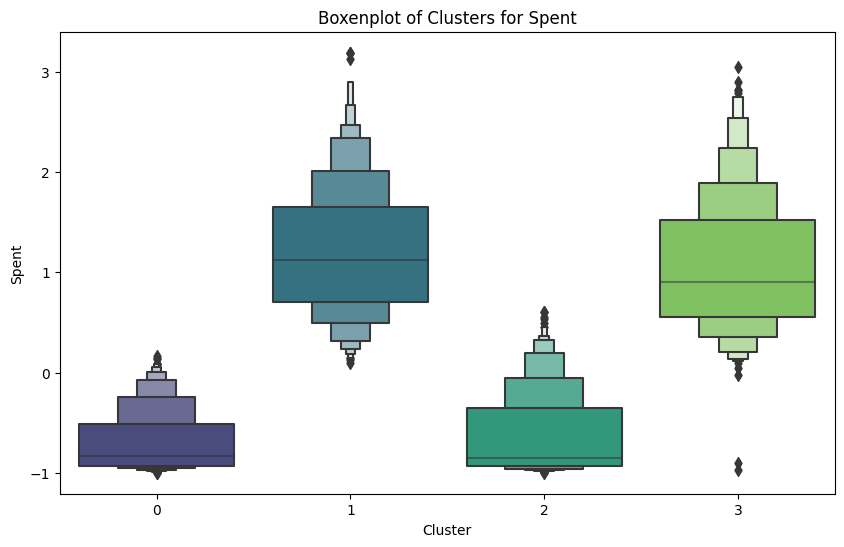

In [21]:
# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spent', hue='Cluster', palette='viridis')
plt.title('Scatterplot of Clusters')
plt.xlabel('Age')
plt.ylabel('Spent')
plt.show()

plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='Cluster', y='Age', palette='viridis')
plt.title('Swarmplot of Clusters for Age')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, x='Cluster', y='Spent', palette='viridis')
plt.title('Boxenplot of Clusters for Spent')
plt.xlabel('Cluster')
plt.ylabel('Spent')
plt.show()

## Visualizastion

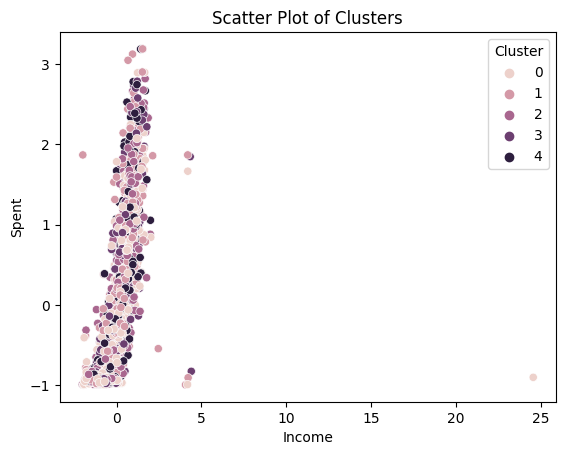

In [16]:
feature1 = 'Income'
feature2 = 'Spent'

cluster_col = 'Cluster'

sns.scatterplot(x=feature1, y=feature2, data=df_new, hue=cluster_col)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Scatter Plot of Clusters')
plt.show()

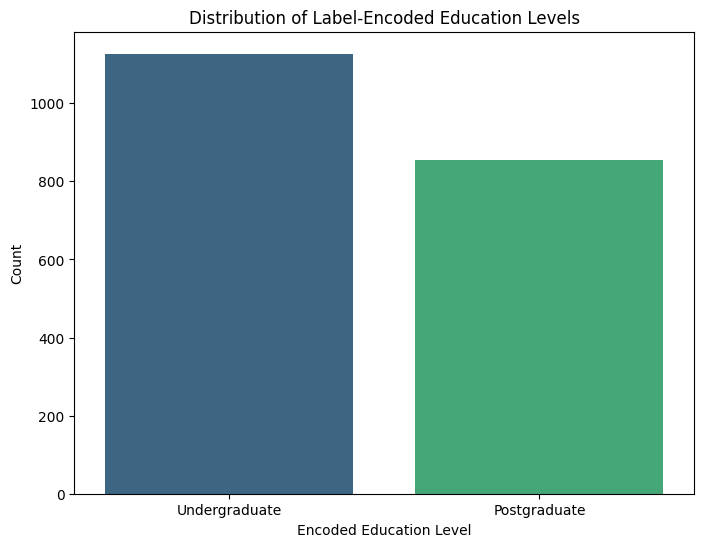

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Education_Level', palette='viridis')
plt.title('Distribution of Label-Encoded Education Levels')
plt.xlabel('Encoded Education Level')
plt.ylabel('Count')
plt.show()

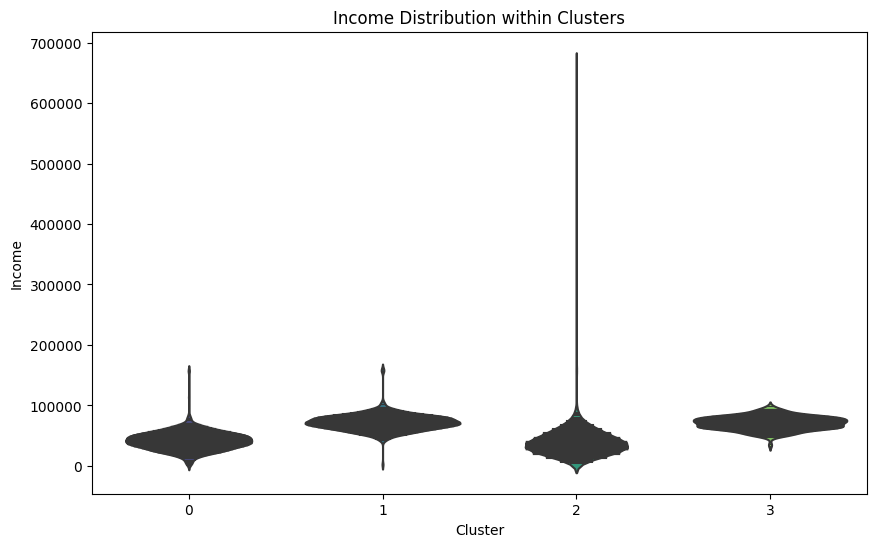

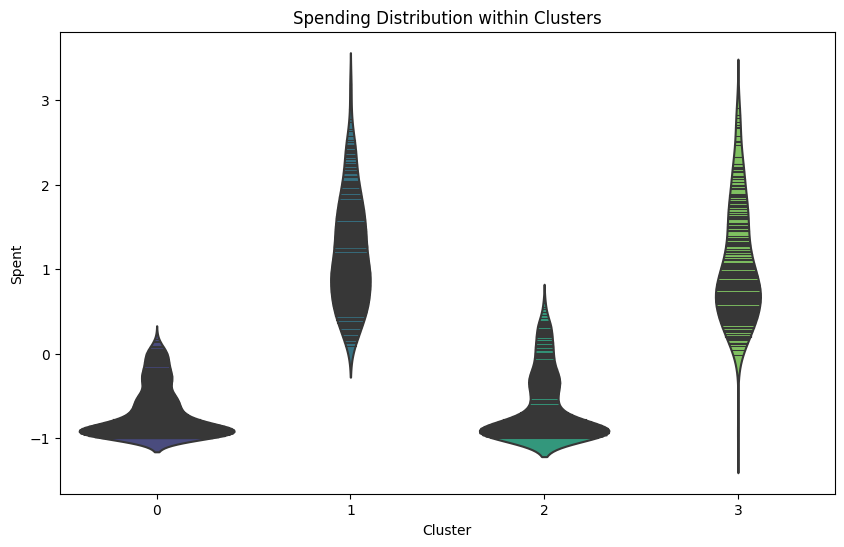

In [24]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Cluster', y='Income', palette='viridis', inner='stick')
plt.title('Income Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Cluster', y='Spent', palette='viridis', inner='stick')
plt.title('Spending Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Spent')
plt.show()